### EDA: 1
EDA on Data from Land Registry

In [1]:
#importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import geocoder
import folium
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing the dataset
df = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/UK-HPI-full-file-2022-05_land_registry_1.xlsx')
df.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,2004-01-02,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2004-01-03,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,2004-01-04,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,2004-01-05,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [6]:
#describing the dataset ( checking statiscs)
df.describe()

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
count,1.369340e+05,136934.000000,4599.000000,136491.000000,131894.000000,4599.000000,132435.000000,1.306370e+05,130637.000000,130228.000000,...,1.301490e+05,130149.000000,129739.000000,125253.000000,129794.000000,1.301580e+05,130158.000000,129748.000000,125262.000000,130144.000000
mean,1.679390e+05,81.277471,83.839599,0.577060,6.619196,158460.884039,1216.563499,2.961552e+05,82.775005,0.521671,...,2.009179e+05,83.211755,0.574627,6.873784,127.559127,1.693750e+05,81.791744,0.514239,6.497537,1103.116141
std,1.132823e+05,35.083942,32.324541,1.993859,8.926884,82089.189229,7591.577874,2.574826e+05,33.360480,1.754480,...,1.184383e+05,34.670375,1.852587,8.536800,813.249380,1.122641e+05,33.107069,1.783433,8.681471,6865.201077
min,2.712016e+03,1.096815,18.312610,-30.297781,-35.786566,40405.313840,2.000000,4.064610e+04,12.494361,-19.628465,...,2.722990e+04,9.708894,-29.816368,-28.851244,0.000000,2.278638e+04,10.097461,-30.587732,-30.341125,2.000000
25%,9.426384e+04,46.953837,57.519430,-0.425305,1.511545,109592.343300,139.000000,1.640175e+05,52.143149,-0.437072,...,1.214724e+05,51.336812,-0.447367,1.874711,9.000000,9.728902e+04,49.560576,-0.441102,1.425206,125.000000
50%,1.472749e+05,89.003520,90.292480,0.533856,5.635033,148884.457100,214.000000,2.376951e+05,88.512634,0.508228,...,1.838796e+05,88.753490,0.550178,5.850462,20.000000,1.479849e+05,89.203337,0.502152,5.517451,192.000000
75%,2.105152e+05,106.513165,106.852440,1.520537,10.844191,194692.982000,373.000000,3.437461e+05,105.838528,1.487354,...,2.499107e+05,106.464017,1.571286,11.425751,44.000000,2.101839e+05,105.849736,1.465296,10.658740,338.000000
max,1.463378e+06,221.485238,158.076988,35.286646,98.437940,527792.225700,163312.666700,4.232089e+06,197.988967,34.812357,...,1.354420e+06,214.250819,34.946588,96.170727,21097.333330,1.479584e+06,207.478740,35.552952,98.648458,154972.000000


In [7]:
#checking the length of dataset
df.shape

(136934, 54)

In [8]:
#creating a separate dataframe which contains the countries data
df_uk = df[df.RegionName=='United Kingdom']
df_scot = df[df.RegionName=='Scotland']
df_eng = df[df.RegionName=='England']
df_wales= df[df.RegionName=='Wales']
df_NI = df[df.RegionName=='Northern Ireland']

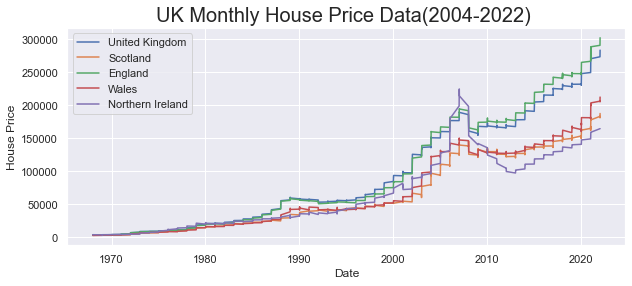

In [9]:
# plotting the average House Price of Different countries over years

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
sns.lineplot(data = df_uk, x='Date',y='AveragePrice', label='United Kingdom')
sns.lineplot(data = df_scot, x='Date',y='AveragePrice', label='Scotland')
sns.lineplot(data = df_eng, x='Date',y='AveragePrice', label='England')
sns.lineplot(data = df_wales, x='Date',y='AveragePrice', label='Wales')
sns.lineplot(data = df_NI, x='Date',y='AveragePrice', label='Northern Ireland')
plt.title("UK Monthly House Price Data(2004-2022) ",fontdict={'fontsize':20})
plt.xlabel("Date")
plt.ylabel('House Price')
plt.show()

We can see from the above chart that ENGLAND has the highest average house prices , whereas Northern Ireland has the lowest.

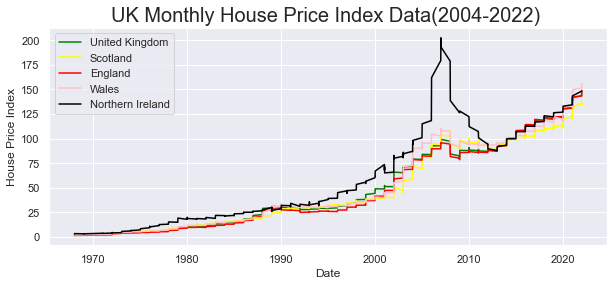

In [10]:
#plotting the House price indexes for all countries in UK.
plt.figure(figsize=(10,4))
sns.lineplot(data = df_uk, x='Date',y='Index', label='United Kingdom',color='green')
sns.lineplot(data = df_scot, x='Date',y='Index', label='Scotland',color='yellow')
sns.lineplot(data = df_eng, x='Date',y='Index', label='England',color='red')
sns.lineplot(data = df_wales, x='Date',y='Index', label='Wales',color='pink')
sns.lineplot(data = df_NI, x='Date',y='Index', label='Northern Ireland',color='black')
plt.title("UK Monthly House Price Index Data(2004-2022) ",fontdict={'fontsize':20})
plt.xlabel("Date")
plt.ylabel('House Price Index')
plt.show()

We can see from the above chart , that Northern Ireland has the highest House Price Index.

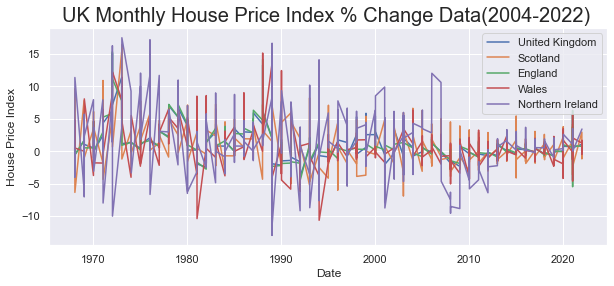

In [11]:
#plotting the House price indexes percentage change for all countries in UK.
plt.figure(figsize=(10,4))
sns.lineplot(data = df_uk, x='Date',y='1m%Change', label='United Kingdom')
sns.lineplot(data = df_scot, x='Date',y='1m%Change', label='Scotland')
sns.lineplot(data = df_eng, x='Date',y='1m%Change', label='England')
sns.lineplot(data = df_wales, x='Date',y='1m%Change', label='Wales')
sns.lineplot(data = df_NI, x='Date',y='1m%Change', label='Northern Ireland')
plt.title("UK Monthly House Price Index % Change Data(2004-2022) ",fontdict={'fontsize':20})
plt.xlabel("Date")
plt.ylabel('House Price Index')
plt.show()

 We can see from the above chart the maximum fluctuations are observed in Northern Ireland.

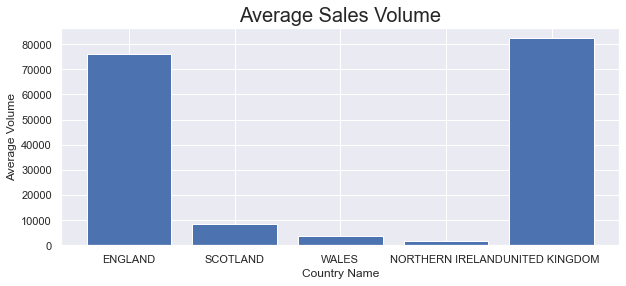

In [13]:
#plotting the average sales volume 
country_name = ['ENGLAND', 'SCOTLAND','WALES','NORTHERN IRELAND','UNITED KINGDOM']
sales_lst = [df_eng['SalesVolume'].mean(),df_scot['SalesVolume'].mean(),df_wales['SalesVolume'].mean(),
             df_NI['SalesVolume'].mean(),df_uk['SalesVolume'].mean()]
plt.figure(figsize=(10,4))
plt.bar(country_name,sales_lst)
plt.title('Average Sales Volume',fontdict={'fontsize':20})
plt.xlabel("Country Name")
plt.ylabel('Average Volume')
plt.show()

We can see that England has the highest sales while Northern Ireland has the lowest.

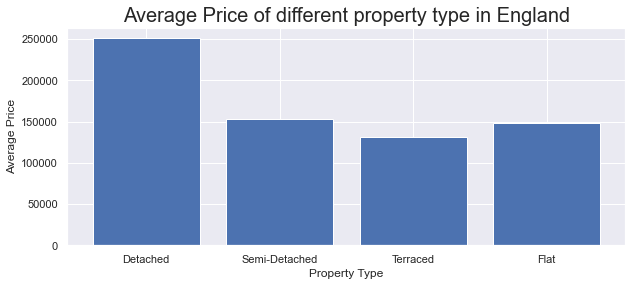

In [14]:
# plotting the average price of types of properties in United Kingdom
property_type =['Detached', 'Semi-Detached', 'Terraced','Flat']
eng_property = [df_eng['DetachedPrice'].mean(),df_eng['SemiDetachedPrice'].mean(),
               df_eng['TerracedPrice'].mean(),df_eng['FlatPrice'].mean()]
plt.figure(figsize=(10,4))
plt.bar(property_type,eng_property)
plt.title('Average Price of different property type in England',fontdict={'fontsize':20})
plt.xlabel("Property Type")
plt.ylabel('Average Price')
plt.show()

We can see from the above chart that the detached property has the highest price whereas terraced property is the lowest in England.

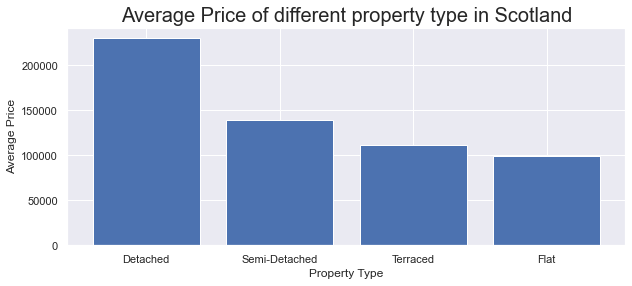

In [15]:
# plotting the average price of types of properties in Scotland

scot_property = [df_scot['DetachedPrice'].mean(),df_scot['SemiDetachedPrice'].mean(),
               df_scot['TerracedPrice'].mean(),df_scot['FlatPrice'].mean()]
plt.figure(figsize=(10,4))
plt.bar(property_type,scot_property)
plt.title('Average Price of different property type in Scotland',fontdict={'fontsize':20})
plt.xlabel("Property Type")
plt.ylabel('Average Price')
plt.show()

We can see from the above chart that the detached property has the highest price whereas Flat property is the lowest in Scotland.

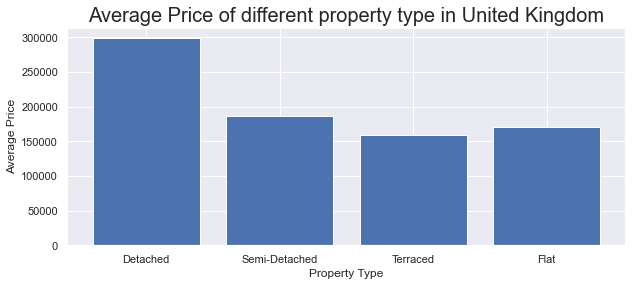

In [16]:
# plotting the average price of types of properties in United Kingdom

uk_property = [df_uk['DetachedPrice'].mean(),df_uk['SemiDetachedPrice'].mean(),
               df_uk['TerracedPrice'].mean(),df_uk['FlatPrice'].mean()]
plt.figure(figsize=(10,4))
plt.bar(property_type,uk_property)
plt.title('Average Price of different property type in United Kingdom',fontdict={'fontsize':20})
plt.xlabel("Property Type")
plt.ylabel('Average Price')
plt.show()

We can see from the above chart that the detached property has the highest price whereas terraced property is the lowest in United Kingdom.

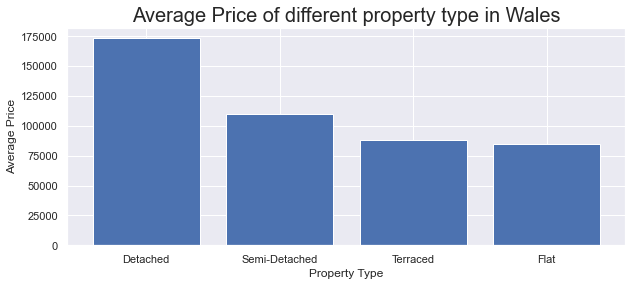

In [17]:
# plotting the average price of types of properties in Wales

wales_property = [df_wales['DetachedPrice'].mean(),df_wales['SemiDetachedPrice'].mean(),
               df_wales['TerracedPrice'].mean(),df_wales['FlatPrice'].mean()]
plt.figure(figsize=(10,4))
plt.bar(property_type,wales_property)
plt.title('Average Price of different property type in Wales',fontdict={'fontsize':20})
plt.xlabel("Property Type")
plt.ylabel('Average Price')
plt.show()

We can see from the above chart that the detached property has the highest price whereas Flat property is the lowest in Wales.

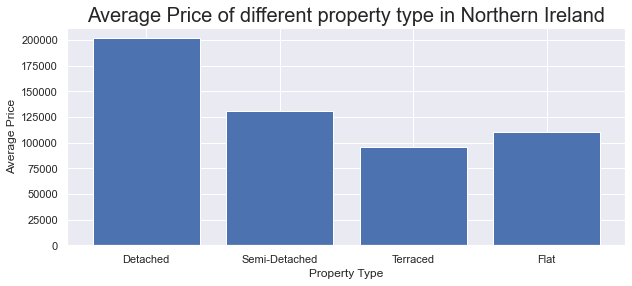

In [18]:
# plotting the average price of types of properties in Northern Ireland

ni_property = [df_NI['DetachedPrice'].mean(),df_NI['SemiDetachedPrice'].mean(),
               df_NI['TerracedPrice'].mean(),df_NI['FlatPrice'].mean()]
plt.figure(figsize=(10,4))
plt.bar(property_type,ni_property)
plt.title('Average Price of different property type in Northern Ireland',fontdict={'fontsize':20})
plt.xlabel("Property Type")
plt.ylabel('Average Price')
plt.show()

We can see from the above chart that the detached property has the highest price whereas terraced property is the lowest in Northern Ireland.

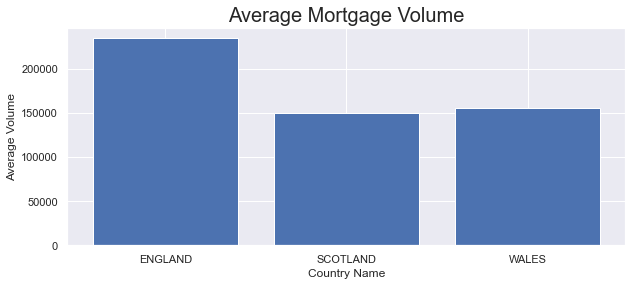

In [19]:
#plotting mortgage prices among the countries

country_name = ['ENGLAND', 'SCOTLAND','WALES','NORTHERN IRELAND','UNITED KINGDOM']
sales_lst = [df_eng['MortgagePrice'].mean(),df_scot['MortgagePrice'].mean(),df_wales['MortgagePrice'].mean(),
             df_NI['MortgagePrice'].mean(),df_uk['MortgagePrice'].mean()]
plt.figure(figsize=(10,4))
plt.bar(country_name,sales_lst)
plt.title('Average Mortgage Volume',fontdict={'fontsize':20})
plt.xlabel("Country Name")
plt.ylabel('Average Volume')
plt.show()

We can see that England has the highest mortgage prices while scotland has the lowest.

### Plotting the prices over the geographical map


In [21]:
#importing the dataset
df_all = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/UK-HPI-full-file-2022-05_land_registry_1.xlsx',sheet_name='Sheet1')
df_all.head()

,Date,AreaCode,RegionName,Country,AveragePrice,Index,DetachedPrice,DetachedIndex,SemiDetachedPrice,SemiDetachedIndex,TerracedPrice,TerracedIndex,FlatPrice,FlatIndex
0,2022-01-05,S12000034,Aberdeenshire,Scotland,202557.5499,101.321865,291818.5518,103.898171,176281.0867,101.981358,144251.4545,99.885853,103648.42900,91.597882
1,2022-01-05,E07000223,Adur,England,374366.8221,149.953080,589634.8687,156.572932,427194.4734,154.299567,366894.1859,153.295152,219217.21870,136.792088
2,2022-01-05,E07000026,Allerdale,England,168799.3463,124.578590,255977.2284,129.374073,165069.7650,125.412416,135711.0135,122.071558,100806.40960,110.193942
3,2022-01-05,E07000032,Amber Valley,England,212442.2828,147.562038,309674.3669,150.595518,191401.0786,148.138008,157420.4955,144.630445,115427.25750,126.924980
4,2022-01-05,S12000041,Angus,Scotland,171135.5138,123.672084,288151.8865,129.609512,181340.2010,126.305327,129463.2992,123.149716,94453.76837,113.537526


In [22]:
#separting the cities as per countries and making different dataframes
df_e = df_all[df_all.Country=='England']
df_w = df_all[df_all.Country=='Wales']
df_s = df_all[df_all.Country=='Scotland']
df_n = df_all[df_all.Country=='Northern Ireland']


In [23]:
#calling nominatim function
geolocator = Nominatim(user_agent="UK")

In [24]:
#getting the co-ordinates of the cities of england
lat=[]
long=[]
for name in df_e['RegionName']:
    address = str(name+", England")
    location = geocoder.arcgis(address)
    lat.append(location.latlng[0])
    long.append(location.latlng[1])
df_e['lat']=lat
df_e['long']=long

In [25]:
#getting the co-ordinates of the cities of wales
lat=[]
long=[]
for name in df_w['RegionName']:
    address = str(name+", Wales")
    location = geocoder.arcgis(address)
    lat.append(location.latlng[0])
    long.append(location.latlng[1])
df_w['lat']=lat
df_w['long']=long

In [26]:
#getting the co-ordinates of the cities of scotland
lat=[]
long=[]
for name in df_s['RegionName']:
    address = str(name+", Scotland")
    location = geocoder.arcgis(address)
    lat.append(location.latlng[0])
    long.append(location.latlng[1])
df_s['lat']=lat
df_s['long']=long

In [27]:
#getting the co-ordinates of the cities of northern ireland
lat=[]
long=[]
for name in df_n['RegionName']:
    address = str(name+", Northern Ireland")
    location = geocoder.arcgis(address)
    lat.append(location.latlng[0])
    long.append(location.latlng[1])
df_n['lat']=lat
df_n['long']=long

In [28]:
#plotting a map 
map_UK=folium.Map(location=[53.584797 , -2.438721],zoom_start=6)
for lat,lng,area,price in zip(df_e['lat'],df_e['long'],df_e['RegionName'],df_e['AveragePrice']):
    label='Name :{}, Price :£{}'.format(area,price)
    folium.CircleMarker([lat,lng],color='red',popup=label,fill=True,fill_color='red',fill_opacity=0.6).add_to(map_UK)
for lat,lng,area,price in zip(df_w['lat'],df_w['long'],df_w['RegionName'],df_w['AveragePrice']):
    label='Name :{}, Price :£{}'.format(area,price)
    folium.CircleMarker([lat,lng],color='Blue',popup=label,fill=True,fill_color='blue',fill_opacity=0.6).add_to(map_UK)
for lat,lng,area,price in zip(df_s['lat'],df_s['long'],df_s['RegionName'],df_s['AveragePrice']):
    label='Name :{}, Price :£{}'.format(area,price)
    folium.CircleMarker([lat,lng],color='green',popup=label,fill=True,fill_color='green',fill_opacity=0.6).add_to(map_UK)
for lat,lng,area,price in zip(df_n['lat'],df_n['long'],df_n['RegionName'],df_n['AveragePrice']):
    label='Name :{}, Price :£{}'.format(area,price)
    folium.CircleMarker([lat,lng],color='yellow',popup=label,fill=True,fill_color='yellow',fill_opacity=0.6).add_to(map_UK)
map_UK